In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df= pd.read_csv("dailyActivity_merged.csv")
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

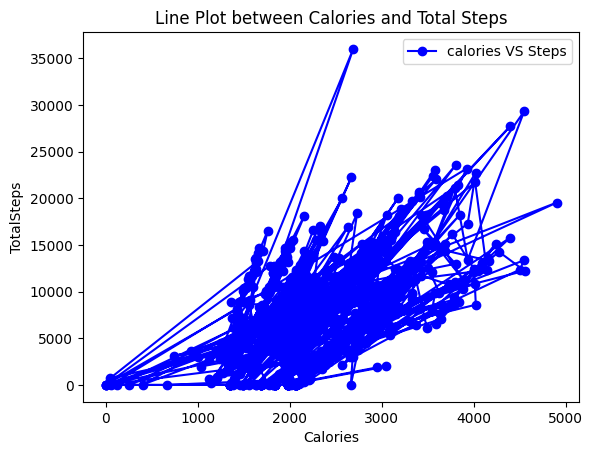

In [5]:

plt.plot(df['Calories'],df['TotalSteps'], marker='o', linestyle='-', color='b', label ='calories VS Steps')

plt.title('Line Plot between Calories and Total Steps')
plt.xlabel('Calories')
plt.ylabel('TotalSteps')

plt.legend()

plt.show()

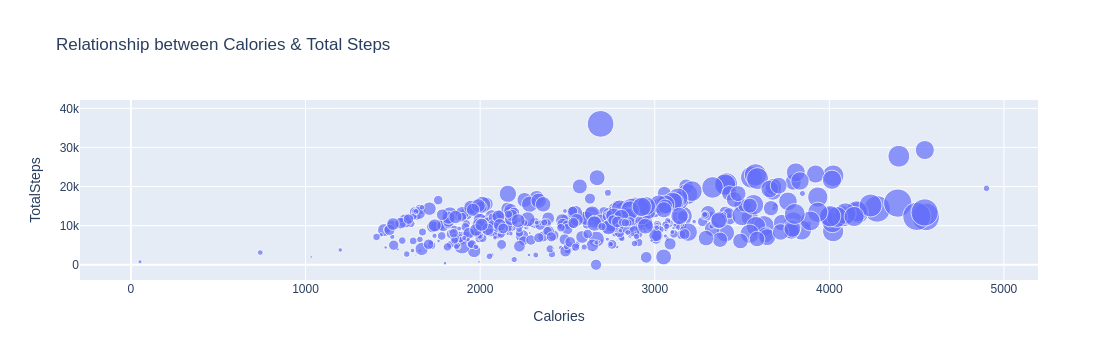

In [7]:
figure = px.scatter(data_frame = df, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes",
                    title="Relationship between Calories & Total Steps")
figure.show()

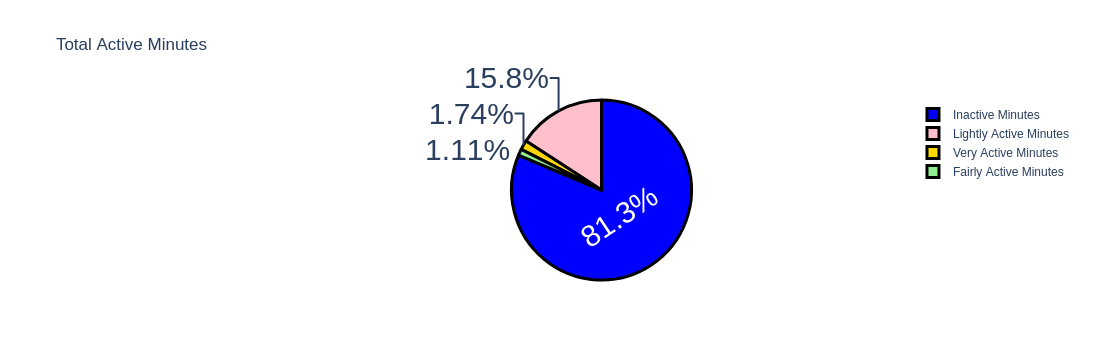

In [8]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = df[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [9]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [10]:
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"], 
                                      format="%m/%d/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [11]:
df["TotalMinutes"] = df["VeryActiveMinutes"] + df["FairlyActiveMinutes"] + df["LightlyActiveMinutes"] + df["SedentaryMinutes"]
print(df["TotalMinutes"].sample(5))

221    1440
539    1024
283    1440
386    1366
519     990
Name: TotalMinutes, dtype: int64


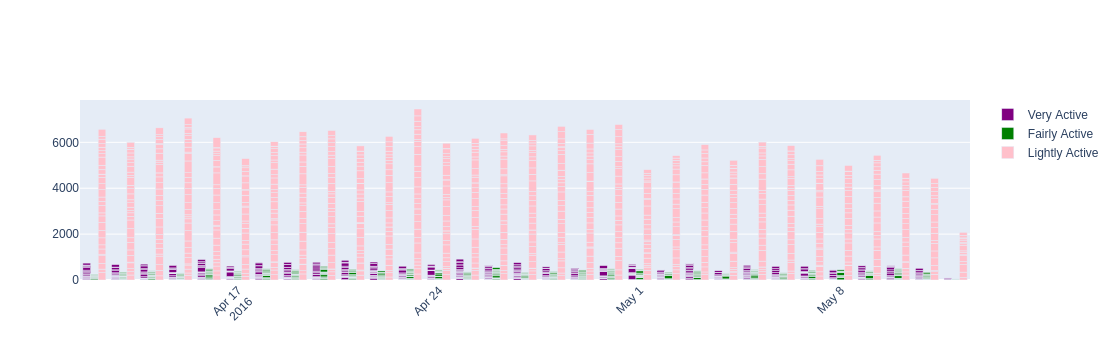

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df["ActivityDate"],
    y=df["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=df["ActivityDate"],
    y=df["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=df["ActivityDate"],
    y=df["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()